<a href="https://colab.research.google.com/github/tanvikurade/Best-seller-Books/blob/main/bestseller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  
import pandas_profiling as pp 
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("bestsellerbook.csv")

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
df.describe

<bound method NDFrame.describe of                                                   Name  ...        Genre
0                        10-Day Green Smoothie Cleanse  ...  Non Fiction
1                                    11/22/63: A Novel  ...      Fiction
2              12 Rules for Life: An Antidote to Chaos  ...  Non Fiction
3                               1984 (Signet Classics)  ...      Fiction
4    5,000 Awesome Facts (About Everything!) (Natio...  ...  Non Fiction
..                                                 ...  ...          ...
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)  ...      Fiction
546  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
547  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
548  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
549  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction

[550 rows x 7 columns]>

In [6]:
df.info

<bound method DataFrame.info of                                                   Name  ...        Genre
0                        10-Day Green Smoothie Cleanse  ...  Non Fiction
1                                    11/22/63: A Novel  ...      Fiction
2              12 Rules for Life: An Antidote to Chaos  ...  Non Fiction
3                               1984 (Signet Classics)  ...      Fiction
4    5,000 Awesome Facts (About Everything!) (Natio...  ...  Non Fiction
..                                                 ...  ...          ...
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)  ...      Fiction
546  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
547  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
548  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
549  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction

[550 rows x 7 columns]>

In [7]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [8]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There's no null value

In [9]:
categorical_column = [column for column in df.columns if df[column].dtype=='object']
categorical_column

['Name', 'Author', 'Genre']

In [10]:
categorical = df[categorical_column]

In [11]:
categorical['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [12]:
Genre = pd.get_dummies(categorical['Genre'],drop_first=True)

In [13]:
Genre.head()

,Non Fiction
0,1
1,0
2,1
3,0
4,1


Data Visualisation

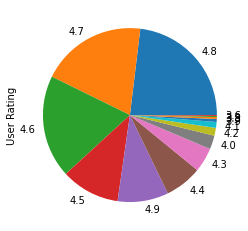

In [15]:
y = df["User Rating"].value_counts()
y.plot(kind="pie")

In [16]:
fig = px.histogram(df, x="User Rating",labels={'':'The Number of Books'},title="User Rating Histogram")
fig.show()

In [17]:
authors = df["Author"].value_counts()
author_times = []
author_names = []
for i in range(len(authors)):
    author_names.append(authors.keys()[i])
    author_times.append(authors[i])

In [18]:
popular_authors = pd.DataFrame({"Author":author_names,"Number of Times":author_times})
popular_authors

,Author,Number of Times
0,Jeff Kinney,12
1,Rick Riordan,11
2,Suzanne Collins,11
3,Gary Chapman,11
4,American Psychological Association,10
...,...,...
243,Steve Harvey,1
244,Khaled Hosseini,1
245,Kevin Kwan,1
246,Muriel Barbery,1


In [20]:
df[['User Rating','Author','Name']].groupby(by=['Author','Name']).mean().sort_values(by
=['User Rating'],ascending=False).head(5)

,,User Rating
Author,Name,
J. K. Rowling,"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",4.9
Dav Pilkey,Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3),4.9
J.K. Rowling,"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9
Brandon Stanton,Humans of New York : Stories,4.9
J.K. Rowling,"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",4.9


In [24]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_fic= []
for i in year:
    fic = df[(df["Year"] == i) & (df["Genre"] == "Fiction")]
    num_fic.append(len(fic))
df_fict = pd.DataFrame({"Year": year,"numberofFiction": num_fic})
df_fict.head()

,Year,numberofFiction
0,2009,24
1,2010,20
2,2011,21
3,2012,21
4,2013,24


In [25]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_nonfic= []
for i in year:
    nonfic = df[(df["Year"] == i) & (df["Genre"] == "Non Fiction")]
    num_nonfic.append(len(nonfic))
df_nonfict = pd.DataFrame({"Year": year,"numberofNonFiction": num_nonfic})
df_nonfict.head()

,Year,numberofNonFiction
0,2009,26
1,2010,30
2,2011,29
3,2012,29
4,2013,26


In [26]:
df_nonfict["numberofFiction"] = df_fict["numberofFiction"]
df_nonfict.head()

,Year,numberofNonFiction,numberofFiction
0,2009,26,24
1,2010,30,20
2,2011,29,21
3,2012,29,21
4,2013,26,24


In [27]:
df_genre = df_nonfict.copy()
df_genre.head()

,Year,numberofNonFiction,numberofFiction
0,2009,26,24
1,2010,30,20
2,2011,29,21
3,2012,29,21
4,2013,26,24


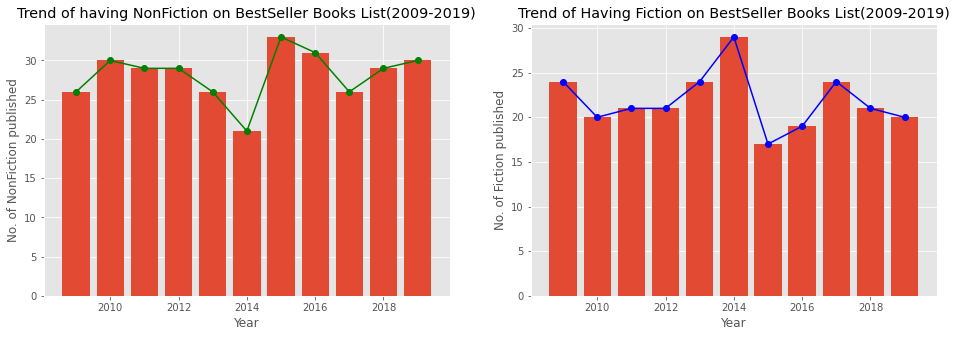

In [28]:
plt.style.use("ggplot")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(x = df_genre["Year"],height=df_genre["numberofNonFiction"],)
plt.plot(df_genre["Year"],df_genre["numberofNonFiction"],"go-")
#plt.plot(df_genre["Year"],df_genre["numberofFiction"],"bo-")
plt.title("Trend of having NonFiction on BestSeller Books List(2009-2019)")
plt.xlabel("Year")
plt.ylabel("No. of NonFiction published")

plt.subplot(1,2,2)
plt.bar(x = df_genre["Year"],height=df_genre["numberofFiction"],)
plt.plot(df_genre["Year"],df_genre["numberofFiction"],"bo-")
plt.title("Trend of Having Fiction on BestSeller Books List(2009-2019)")
plt.xlabel("Year")
plt.ylabel("No. of Fiction published")
plt.show()

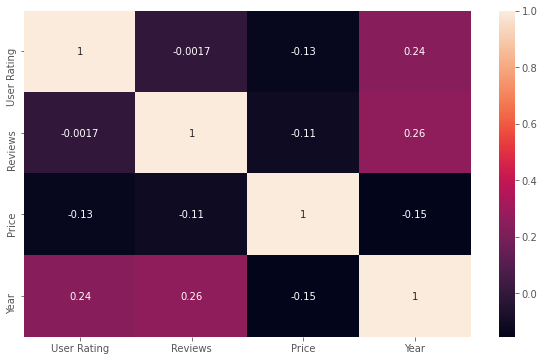

In [29]:
#check correlation and plot heatmap 
correlation = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation,annot=True)
plt.show()

In [30]:
df['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition                                              10
StrengthsFinder 2.0                                                                                                     9
Oh, the Places You'll Go!                                                                                               8
The Very Hungry Caterpillar                                                                                             7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                                            7
                                                                                                                       ..
Harry Potter and the Cursed Child, Parts 1 & 2, Special Rehearsal Edition Script                                        1
Difficult Riddles For Smart Kids: 300 Difficult Riddles And Brain Teasers Families Will Love (Books for Smart Kids)     1
Have a Little Faith: A T

In [31]:
from sklearn.preprocessing import LabelEncoder

df = df.copy(deep = True)
LE = LabelEncoder()
df['Genre'] = LE.fit_transform(df['Genre'])
df['Author'] = LE.fit_transform(df['Author'])
df['Name'] = LE.fit_transform(df['Name'])
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,0,114,4.7,17350,8,2016,1
1,1,219,4.6,2052,22,2011,0
2,2,134,4.7,18979,15,2018,1
3,3,95,4.7,21424,6,2017,0
4,4,174,4.8,7665,12,2019,1


In [32]:
X=df.drop(['User Rating'],axis=1)
y=df[['User Rating']]
X.head()


,Name,Author,Reviews,Price,Year,Genre
0,0,114,17350,8,2016,1
1,1,219,2052,22,2011,0
2,2,134,18979,15,2018,1
3,3,95,21424,6,2017,0
4,4,174,7665,12,2019,1


In [34]:
pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=8)
from catboost import CatBoostRegressor
CB = CatBoostRegressor(iterations=603,
                          learning_rate=0.35,
                          depth=8)
CB.fit(X_train,y_train)

0:	learn: 0.2116434	total: 50.7ms	remaining: 30.5s
1:	learn: 0.1999766	total: 55.8ms	remaining: 16.8s
2:	learn: 0.1844504	total: 59.2ms	remaining: 11.8s
3:	learn: 0.1723032	total: 62.3ms	remaining: 9.34s
4:	learn: 0.1625564	total: 65.7ms	remaining: 7.86s
5:	learn: 0.1568749	total: 69ms	remaining: 6.86s
6:	learn: 0.1500482	total: 72.3ms	remaining: 6.15s
7:	learn: 0.1457983	total: 75.5ms	remaining: 5.61s
8:	learn: 0.1397465	total: 78.7ms	remaining: 5.2s
9:	learn: 0.1358113	total: 81.9ms	remaining: 4.86s
10:	learn: 0.1328120	total: 85.5ms	remaining: 4.6s
11:	learn: 0.1296155	total: 88.8ms	remaining: 4.37s
12:	learn: 0.1250442	total: 92.1ms	remaining: 4.18s
13:	learn: 0.1214010	total: 95.4ms	remaining: 4.01s
14:	learn: 0.1183302	total: 98.9ms	remaining: 3.88s
15:	learn: 0.1145268	total: 102ms	remaining: 3.75s
16:	learn: 0.1097663	total: 105ms	remaining: 3.63s
17:	learn: 0.1072627	total: 108ms	remaining: 3.52s
18:	learn: 0.1043360	total: 112ms	remaining: 3.43s
19:	learn: 0.0996327	total: 11

In [36]:
y_pred=CB.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.16332204161800207